**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

**Esta nota utiliza la versión clásica de notebooks de jupyter a través del siguiente botón:**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=/tree/Propedeutico/Python/clases/3_algebra_lineal/2_interpolacion.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter. **Se utiliza la versión clásica pues se usará el comando de magic `%matplotlib notebook`**

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/python3) Esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


# Interpolación

Dados $n+1$ puntos $x_0,x_1,\dots,x_n$ el objetivo es construir una función $f(x)$ tal que $f(x_i) = y_i$ con $y_i$ conocido $\forall i=0,1,\dots,n$.

<img src="https://dl.dropboxusercontent.com/s/m0gks881yffz85f/interpolacion.jpg?dl=0" heigth="300" width="300">

Entre las aplicaciones en interpolación se encuentran:

* Reconstrucción de funciones.
* Aproximación a derivadas e integrales.
* Estimación de funciones en cantidades no conocidas.

## Modelo en interpolación

Típicamente el modelo $f$ es de la forma $f(x|w) = \displaystyle \sum_{j=0}^nw_j \phi_j(x)$ con $\phi_j:\mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas y $w_j$ parámetros desconocidos por determinar $\forall j=0,1,\dots,n$.

- Tiene forma de sumas ponderada.

- No estamos colocando ninguna restricción a las $w$s

**Obs:**

* Comúnmente las $\phi_j$'s son funciones polinomiales, trigonométricas, racionales y exponenciales.
* La notación $f(x|w)$ se utiliza para denotar que $w$ es un vector de parámetros a estimar.

## ¿Cómo ajustar el modelo anterior?

El problema de interpolación conduce a plantear y posteriormente resolver un sistema de ecuaciones lineales de la forma $Aw = y$ pues la condición de interpolación es: $f(x_i|w_i) = y_i$, $\forall i=0,1,\dots,n$ con $A \in \mathbb{R}^{{n+1}x{n+1}}$, $w,y \in \mathbb{R}^{n+1}$ definidas como sigue:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)
\end{array}
\right],
w=
\left[\begin{array}{c}
w_0\\
w_1\\
\vdots \\
w_n
\end{array}
\right] ,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_n
\end{array}
\right]
$$

Esto es, hay que resolver: $$\begin{array}{ccc} \phi_0(x_0)w_0 + \phi_1(x_0)w_1 + \cdots + \phi_n(x_0)w_n  &= & y_0 \\ \phi_0(x_1)w_0 + \phi_1(x_1)w_1 + \cdots + \phi_n(x_1)w_n  &= & y_1\\ \vdots & & \\ \phi_0(x_n)w_0 + \phi_1(x_n)w_1 + \cdots + \phi_n(x_n)w_n  &= & y_n \end{array}$$ 

que es la condición de  interpolación $f(x_i|w) = y_i \forall i=0,1,\dots,n$ bajo el modelo: $f(x|w) = \displaystyle \sum_{j=0}^nw_j \phi_j(x)$ en notación **matricial**.

Por qué podemos reescribir a problema algebráico? -> Por la condición de interpolación.

## Interpolación polinomial: funciones $\phi_j$'s son polinomios

**En numpy ...**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

Supongamos que queremos realizar la interpolación a los siguientes puntos:

In [ ]:
#pseudorandom array
np.random.seed(2000) #for reproducibility
npoints = 6
x = np.random.randn(npoints) + 10
y = np.random.randn(npoints) - 10


In [ ]:
pprint.pprint('x:')
pprint.pprint(x)
pprint.pprint('y:')
pprint.pprint(y)

ver: [numpy.random.randn](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn)

**Los datos ejemplo**

In [ ]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar lo anterior: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

El tercer argumento de polyfit especifica el grado del polinomio a ajustar. Como tenemos `npoints = 6` puntos, entonces debemos generar un polinomio de grado $5$

In [ ]:
ndegree = npoints -1
coefficients = np.polyfit(x,y,ndegree)

Una vez realizado el llamado a la función `polyfit` se regresan los coeficientes de $x$ ordenados del mayor grado al menor.

In [ ]:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
pprint.pprint(coefficients)

Entonces nuestro polinomio es: $$p_{npoints}(x) = .0816x^5 -4.26x^4 +87.8x^3-895x^2+4500x-8980$$

$$\phi_0(x) = 1, \phi_1(x) = x,    \phi_2(x) = xˆ2 ... \phi_5(xˆ5)$$

**La gráfica**

Ahora nos gustaría graficarlo en el intervalo `[min(x),max(x)]` con `min(x)` la entrada con valor mínimo del numpy array `x` y `max(x)` su entrada con valor máximo.

Para lo anterior debemos evaluar $p_{npoints}(x)$ en diferentes valores de $x$. Para esto, generamos un numpy array con un número de puntos `neval`:

In [ ]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(coefficients,xeval)

In [ ]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

In [ ]:
plt.plot(x, y, 'r*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

In [ ]:
max(yeval)

Si tuviéramos que estimar cantidades negativas con nuestro interpolador, entonces la siguiente estimación calcularíamos:

In [ ]:
np.polyval(coefficients, 8.5)

### Problema con: número de puntos y la interpolación polinomial

Si incrementamos a 9 puntos por los que deseamos hacer pasar un interpolador tenemos:

In [ ]:
#pseudorandom array
np.random.seed(2000) #for reproducibility
npoints = 9
x = np.random.randn(npoints) + 10
y = np.random.randn(npoints) - 10

In [ ]:
pprint.pprint('x:')
pprint.pprint(x)
pprint.pprint('y:')
pprint.pprint(y)

**Los datos**

In [ ]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

In [ ]:
ndegree = npoints -1
new_coefficients = np.polyfit(x,y,ndegree)
pprint.pprint(new_coefficients)

Nuestro polinomio ahora es (considerando dos dígitos a la derecha del punto decimal de los resultados anteriores): $$p_{npoints}(x) = 2.55x^8 -201x^7 + 6940x^6-1.36*10^5x^5+1.66*10^6x^4-1.3*10^7x^3 +6.31*10^7x^2-1.75*10^8x+2.11*10^8$$

**La gráfica**

In [ ]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(new_coefficients,xeval)

In [ ]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

Obsérvese la oscilación que debe tener el polinomio de grado $9$ para pasar por los $10$ puntos:

In [ ]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

In [ ]:
max(yeval)

Este tipo de oscilación es típica al tener un polinomio mayor o igual a $6$ (más de $7$ puntos). Si tuviéramos que estimar cantidades negativas con nuestro interpolador, entonces la siguiente estimación sería errórena:

In [ ]:
np.polyval(new_coefficients,8.5)

lo cual es erróneo.

**Nota**

Los interpoladores obtenidos con alguno de los métodos anteriores se utilizan para estimar cantidades en el intervalo con el que fueron construídos. Si deseamos estimar fuera del intervalo debe de realizarse con cuidado pues se pueden tener estimaciones incorrectas.

In [ ]:
np.polyval(coefficients, 15)

In [ ]:
np.polyval(new_coefficients, 15)

### Polinomios piecewise

Para arreglar la oscilación de interpoladores de grado alto, una solución es interpolar con polinomios de grado bajo en cada subintervalo compuesto por las $x$'s, esto es, una forma *piecewise*. En python se realiza con el método `interpolate` del paquete `scipy`:

**Lineal**

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
pw_l = interp1d(x, y) #linear piecewise 

In [ ]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_l(xeval)

In [ ]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

In [ ]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador lineal piecewise'], loc='best')
plt.show()

Aunque se ha resuelto la estimación:

In [ ]:
print(pw_l(8.5))

Lo malo de este método es que la función no es continua y no podemos sacar derivadas y así

**Splines**

Los *splines* se proponen en cuestiones de predicciones.

Los *splines* cúbicos *piecewise* resuelven la no diferenciabilidad del interpolador lineal en los puntos dados:

In [ ]:
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_spline(xeval)

In [ ]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

In [ ]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')
plt.show()

In [ ]:
print(pw_spline(8.5))

Ver: [Interpolation (scipy.interpolate)](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)

### Ejercicio Tarea

- [x] **Interpolar con 10 puntos generados de la función de [Runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.**

#### Imports

In [ ]:
## Python libraries
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

#### Initial parameters

In [ ]:
x = np.linspace(-1, 1, 10, endpoint=True)

f = lambda x: 1/(1 + 25*x**2)

y = [f(v) for v in x]

#### Interpolation

**Polynomial interpolation *polyfit***

In [ ]:
## Obtaining coefficients of polynomial
n_degree = len(x) - 1
coefficients = np.polyfit(x, y, n_degree)

In [ ]:
## Evaluating polynomial in selected number of points
n_eval_p = 10000
x_eval_p = np.linspace(min(x), max(x), n_eval_p, endpoint=True)
y_eval_p = np.polyval(coefficients, x_eval_p)

**Splines**

In [ ]:
## Obtaining spline interpolation
pw_spline = interp1d(x, y, kind='cubic')

In [ ]:
## Evaluating spline interpolation in selected number of points
n_eval_s = 10000
x_eval_s = np.linspace(min(x), max(x), n_eval_s, endpoint=True)
y_eval_s = pw_spline(x_eval_s)

#### Plot

In [ ]:
plt.plot(
    x, y, 'b*',
    x_eval_p, y_eval_p, 'k-',
    x_eval_s, y_eval_s, 'r-',
)

plt.title('Interpolation of Runge function')
plt.legend(['datos', 'polifit', 'splines'])
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

# Curvas paramétricas e interpolación

Ninguna de las técnicas vistas anteriormente pueden usarse para generar curvas como la de una circunferencia:

- La circunferenciano es una función (si trazas una recta vertical por todo el rango solo debe de tocar un punto)

In [ ]:
radius = 1
npoints = 100

In [ ]:
x = np.linspace(-radius,radius,npoints)
y1 = np.sqrt(radius-x**2)
y2 = -np.sqrt(radius-x**2)

In [ ]:
plt.plot(x,y1,'m',
         x,y2,'m')
plt.title("Circunferencia")
plt.show()

pues no puede expresarse como una función del tipo: $y = f(x)$. Obsérvese que para la gráfica anterior se han usado dos funciones: $y_1 = f_1(x) = \sqrt{r-x^2}$, $y_2 = f_2(x) =  -\sqrt{r-x^2}$.

Lo anterior puede resolverse definiendo una función, $f: \mathbb{R} \rightarrow \mathbb{R}^2$, de un parámetro $t$ que tome valores en el intervalo $[0,2\pi)$ y definida por $f(t) = (\cos(t), \sin(t))$. Obsérvese que para $t=0$ se obtiene el punto $(1,0)$, para $t=\frac{\pi}{2}$ se obtiene $(0,1)$ y así sucesivamente hasta $t=2\pi$ en el que obtendríamos nuevamente el punto $(1,0)$. Para este caso se cumple:

$$f(t) = (x(t), y(t))$$

con $x(t) = \cos(t)$, $y(t) = \sin(t)$ funciones tales que $x : \mathbb{R} \rightarrow \mathbb{R}$, $y: \mathbb{R} \rightarrow \mathbb{R}$.

In [ ]:
import time

In [ ]:
npoints = 100
a = 0
b = 2*np.pi
t = np.linspace(a,b,npoints)
x = np.cos(t)
y = np.sin(t)
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

Ver [plt.draw](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.draw.html#matplotlib-pyplot-draw)

In [ ]:
def make_plot(ax, idx):
    ax.plot(x[:idx], y[:idx])
    window = 0.5
    plt.xlim(x_min-window, x_max+window)
    plt.ylim(y_min-window, y_max+window)
    plt.plot(x[:idx], y[:idx], 'mo')
    fig.canvas.draw() #redraw the current figure

Ver: [matplotlib magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib), [plt.subplots](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib-pyplot-subplots)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots() #create figure that will be used
                         #in make_plot func. Also retrieve axes
for idx,_ in enumerate(t): #enumerate creates tuples 
                           #in a sequentially way
    make_plot(ax, idx)
    time.sleep(0.2)

**Nota: Hay que dar click en el botón arriba de la figura de apagar interactividad.**

## Ejemplo

Usemos la imagen siguiente para realizar una interpolación a una curva paramétrica con *splines*:

In [ ]:
!wget https://www.dropbox.com/s/25zbthmsco6u1u6/hummingbird.png?dl=0 -O hummingbird.png

In [ ]:
%%bash 
ls 

In [ ]:
img=plt.imread('hummingbird.png')
plt.imshow(img)
plt.title('Colibrí')
plt.show()

**Nota: Hay que dar click en el botón arriba de la figura de apagar interactividad.**

**De manera interactiva vamos dando click a la imagen anterior con la siguiente celda, en la lista `pos` se irán guardando las coordenadas en donde hagamos click.**

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Colibrí')
plt.imshow(img)

In [ ]:
pos

**Nota: una vez obtenida la lista `pos` dar click en el botón de apagado de interactividad.**

In [ ]:
pos_array = np.array(pos)

In [ ]:
x = pos_array[:,0]

Algunas entradas imprimimos de $x$:

In [ ]:
x[0:10]

In [ ]:
y = pos_array[:,1]

Algunas entradas imprimimos de $y$:

In [ ]:
y[0:10]

Definamos nuestro parámetro $t$ en el intervalo $[0,1]$:

In [ ]:
t = np.linspace(0,1, len(x))

In [ ]:
t

Construyamos el spline para las curvas $x(t)$, $y(t)$ que nos definirán las coordenadas.

In [ ]:
pw_spline_x = interp1d(t, x, kind = 'cubic') #spline piecewise 
pw_spline_y = interp1d(t,y, kind = 'cubic') #spline piecewise 

Realicemos interpolación en $100$ puntos:

In [ ]:
neval = 100
teval = np.linspace(min(t),max(t), neval)

In [ ]:
xeval = pw_spline_x(teval)
yeval = pw_spline_y(teval)

In [ ]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

In [ ]:
xeval[0:10]

In [ ]:
yeval[0:10]

In [ ]:
window_y = 50
window_x = 500    
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

In [ ]:
fig, ax = plt.subplots()
ax.plot(xeval,yeval)
ax.set_ylim(np.max(y)+window_y,np.min(y)-window_y)
plt.xlim(np.min(x)-window_x,np.max(x)+window_x)
plt.title('Colibrí con interpolación vía curva paramétrica')
plt.show()

In [ ]:
def make_plot(ax, idx):
    ax.plot(x[:idx], y[:idx])
    ax.set_ylim(y_max+window_y,y_min-window_y)
    plt.xlim(x_min-window_x,x_max+window_x)
    plt.plot(x[:idx], y[:idx], 'bo-')
    plt.title('Colibrí con interpolación vía curva paramétrica')
    fig.canvas.draw()

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
for idx,_ in enumerate(t):
    make_plot(ax, idx)
    time.sleep(0.2)

### Ejercicio 2

- [x] **(Tarea) elegir una imagen y realizar interpolación con una curva paramétrica.**

#### Imports

In [25]:
## Python libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import time

#### Reading image

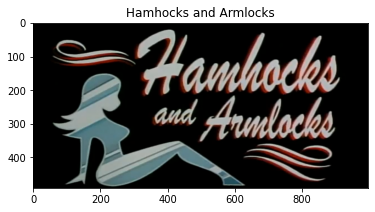

In [2]:
img = plt.imread('h_and_a.png')
plt.imshow(img)
plt.title('Hamhocks and Armlocks')
plt.show()

#### Displaying interactive image and outlining silhouette

<IPython.core.display.Javascript object>


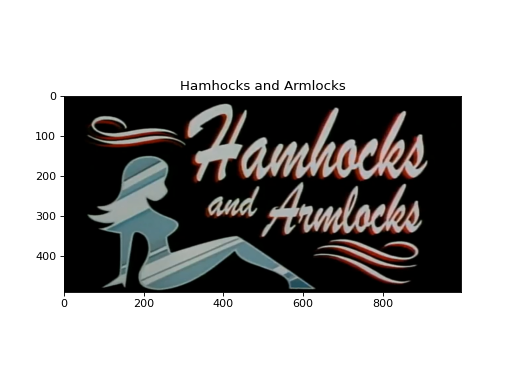

In [3]:
%matplotlib notebook
fig, ax = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata, event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Hamhocks and Armlocks')
plt.imshow(img)

#### Processing coordinates obtained from interactive figure

In [7]:
pos_array

array([[134.0105138 , 263.22893323],
       [111.8996267 , 277.29949774],
       [ 87.77865896, 277.29949774],
       [ 81.74841702, 281.31965903],
       [ 99.83914283, 291.37006226],
       [117.92986864, 291.37006226],
       [ 95.81898154, 299.41038484],
       [ 77.72825573, 299.41038484],
       [ 61.64761057, 301.42046549],
       [ 81.74841702, 319.51119129],
       [ 99.83914283, 323.53135258],
       [123.96011057, 321.52127194],
       [105.86938477, 331.57167516],
       [ 91.79882025, 337.6019171 ],
       [111.8996267 , 343.63215903],
       [127.98027186, 345.64223968],
       [142.05083638, 351.67248162],
       [142.05083638, 393.88417516],
       [142.05083638, 426.04546549],
       [142.05083638, 452.17651387],
       [121.95002993, 470.26723968],
       [ 95.81898154, 486.34788484],
       [132.00043315, 480.31764291],
       [146.07099767, 474.28740097],
       [154.11132025, 482.32772355],
       [158.13148154, 452.17651387],
       [160.14156218, 432.07570742],
 

In [12]:
pos_array = np.array(pos)
x = pos_array[:, 0]
y = pos_array[:, 1]

#### Spline interpolation

In [14]:
## Reference points for spline interpolation
t = np.linspace(0, 1, len(x))

In [17]:
## Spline piecewise interpolation
pw_spline_x = interp1d(t, x, kind='cubic')
pw_spline_y = interp1d(t, y, kind='cubic')

In [18]:
## Evaluation of the spline interpolation
n_eval = 100
t_eval = np.linspace(min(t), max(t), n_eval)

x_eval = pw_spline_x(t_eval)
y_eval = pw_spline_y(t_eval)

#### Plotting figure

In [19]:
window_y = 50
window_x = 50

x_min = np.min(x)
y_min = np.min(y)

x_max = np.max(x)
y_max = np.max(y)

<IPython.core.display.Javascript object>


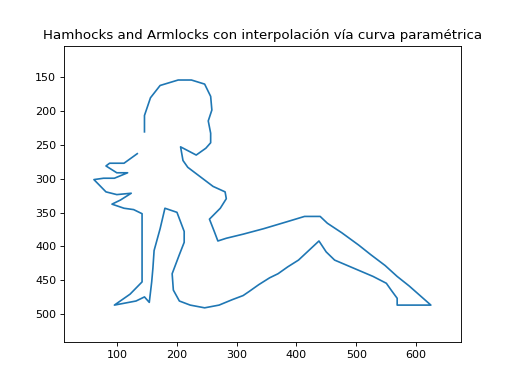

In [21]:
fig, ax = plt.subplots()

ax.plot(x_eval, y_eval)
ax.set_ylim(np.max(y) + window_y, np.min(y) - window_y)

plt.xlim(np.min(x) - window_x, np.max(x) + window_x)

plt.title('Hamhocks and Armlocks con interpolación vía curva paramétrica')

plt.show()

#### Automated plotting

In [22]:
def make_plot(ax, idx):
    
    ax.plot(x[:idx], y[:idx])
    ax.set_ylim(np.max(y) + window_y, np.min(y) - window_y)
    
    plt.xlim(np.min(x) - window_x, np.max(x) + window_x)
    
    plt.title('Hamhocks and Armlocks con interpolación vía curva paramétrica')
    
    fig.canvas.draw()    

<IPython.core.display.Javascript object>


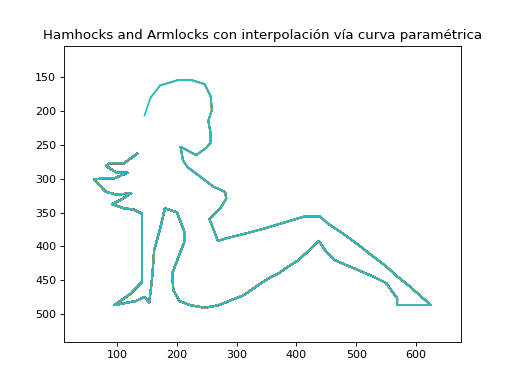

In [26]:
%matplotlib notebook
fig, ax = plt.subplots()
for idx,_ in enumerate(t):
    make_plot(ax, idx)
    time.sleep(0.2)

---

**Referencias:**

* [animated_matplotlib-binder](https://github.com/fomightez/animated_matplotlib-binder)

* [how-get-a-x-y-position-pointing-with-mouse-in-a-interactive-plot-python](https://stackoverflow.com/questions/29379502/how-get-a-x-y-position-pointing-with-mouse-in-a-interactive-plot-python)

* [matplotlib: invert_axes](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/invert_axes.html)